In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

from src.logistic_regression import Logistic_regression

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None 

### LOGISTIC REGRESSION ON RANDOM_OVER_SAMPLE DATAFRAME

-----


In [2]:
df_over = pd.read_pickle('data/generated_data/cardio_processed_over.pkl')
df_over.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,is_smoking_NO,is_smoking_YES,TenYearCHD
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,0.450931,1.000000,0.142857,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,0.883744,-0.200000,-0.214286,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,-1.012582,0.866667,1.142857,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,0.579768,-0.466667,1.142857,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,0.209361,-0.333333,-0.071429,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


In [3]:
response_var = 'TenYearCHD'

In [4]:
title_df_over = 'over_sample'

In [5]:
log_regression_over = Logistic_regression(df_over, response_var, title_df_over)

In [6]:
log_regression_over.fit_model()

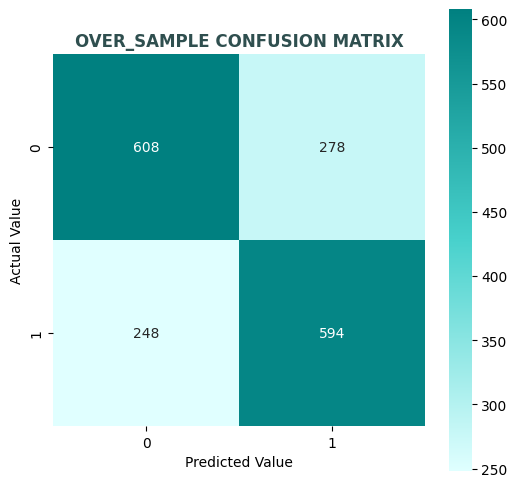

In [7]:
log_regression_over.print_confusion_matrix()

The confusion matrix is unsatisfactory since there are more false positives and false negatives than desired. However, they are evenly balanced, with the model predicting an equal amount of false negatives and false positives.

In [8]:
lr_over_results = log_regression_over.get_metrics('OVER Logistic Regression')
lr_over_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.695602,0.681193,0.705463,0.693116,0.391347,test,OVER Logistic Regression
1,0.654094,0.656448,0.662248,0.659335,0.308039,train,OVER Logistic Regression


In [9]:
log_regression_over.create_df_feature_importance()

,predictor,coeficiente,importance
6,age,0.811845,0.811845
1,BMI_category,0.740993,0.740993
7,cigsPerDay,0.332765,0.332765
9,sysBP,0.312042,0.312042
3,prevalentStroke,0.192108,0.192108
8,totChol,0.161782,0.161782
17,sex_F,-0.148221,0.148221
18,sex_M,0.147539,0.147539
10,BMI,-0.138654,0.138654
19,is_smoking_NO,-0.137143,0.137143


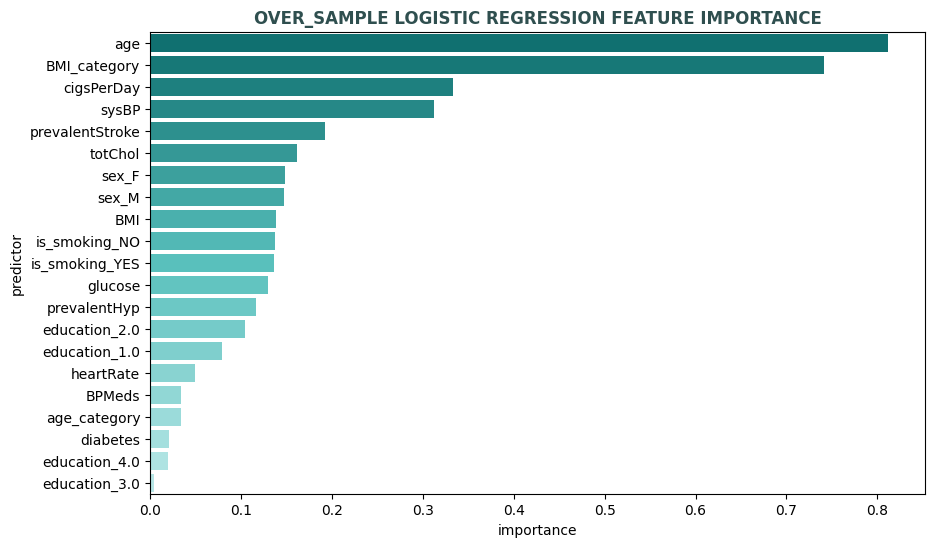

In [10]:
log_regression_over.create_barplot_feature_importance()

###  LOGISTIC REGRESSION  ON TOKEN_SMOTE DATAFRAME

-----


In [11]:
df_ts = pd.read_pickle('data/generated_data/cardio_processed_ts.pkl')
df_ts.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,sex_F,sex_M,is_smoking_NO,is_smoking_YES
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,0.450931,1.000000,0.142857,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,0.883744,-0.200000,-0.214286,0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,-1.012582,0.866667,1.142857,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,0.579768,-0.466667,1.142857,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,0.209361,-0.333333,-0.071429,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [12]:
title_df_ts = 'token smote'

In [13]:
log_regression_ts = Logistic_regression(df_ts, response_var, title_df_ts)

In [14]:
log_regression_ts.fit_model()

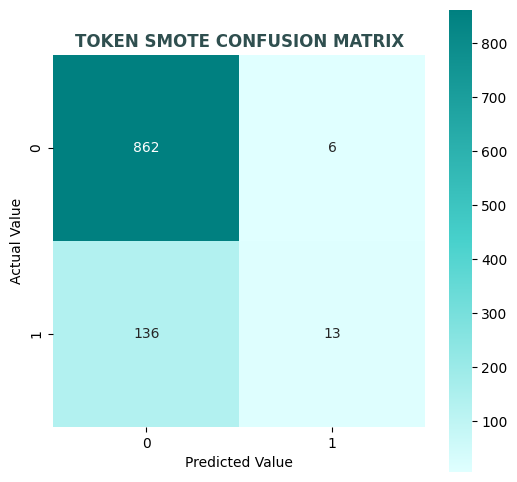

In [15]:
log_regression_ts.print_confusion_matrix()

In this instance, it is noted that the model has a tendency to identify a greater number of false negatives, and it appears to struggle with detecting positive cases. This is crucial as we are predicting a disease, therefore it is essential to identify positive cases.

In [16]:
lr_ts_results = log_regression_ts.get_metrics('TS Logistic Regression')
lr_ts_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.860374,0.684211,0.087248,0.154762,0.125791,test,TS Logistic Regression
1,0.856300,0.744186,0.088398,0.158025,0.129837,train,TS Logistic Regression


In [17]:
log_regression_ts.create_df_feature_importance()

,predictor,coeficiente,importance
6,age,0.876989,0.876989
1,BMI_category,0.593927,0.593927
7,cigsPerDay,0.502335,0.502335
3,prevalentStroke,0.432341,0.432341
9,sysBP,0.387356,0.387356
18,sex_M,0.242115,0.242115
17,sex_F,-0.241760,0.241760
12,glucose,0.143731,0.143731
14,education_2.0,-0.142728,0.142728
10,BMI,-0.137898,0.137898


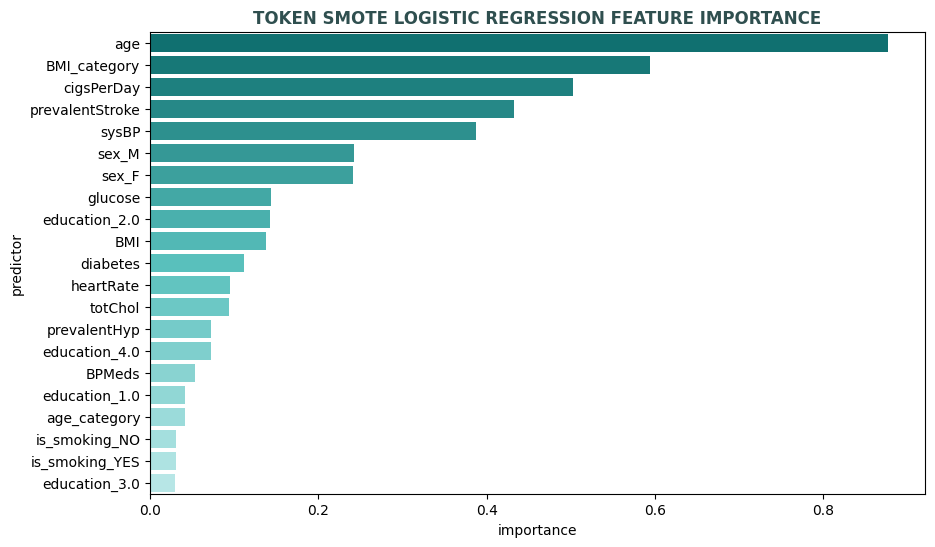

In [18]:
log_regression_ts.create_barplot_feature_importance()

### SAVE RESULTS

-----

In [19]:
all_results = pd.concat([lr_over_results, lr_ts_results], axis = 0)
all_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.695602,0.681193,0.705463,0.693116,0.391347,test,OVER Logistic Regression
1,0.654094,0.656448,0.662248,0.659335,0.308039,train,OVER Logistic Regression
0,0.860374,0.684211,0.087248,0.154762,0.125791,test,TS Logistic Regression
1,0.856300,0.744186,0.088398,0.158025,0.129837,train,TS Logistic Regression


We have achieved acceptable metrics in the Random_Over_Sample Dataframe. Nonetheless, we will attempt new approaches since our kappa is inadequate. However, the Token_Smote dataframe shows a low kappa value, as well as low recall and F1 metrics. These results indicate that our model struggles to detect positive cases, as confirmed by examining the confusion matrix. We therefore reject these results.

In [20]:
# We store the metrics to compare with new models.

all_results.to_pickle('data/generated_data/LR_results.pkl')